Bring in nutrients from 2007

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [2]:
zerociliates = './SalishSea_ZeroCiliates_03021840_restart_trc.nc'

In [3]:
oldnutrients = '/results2/SalishSea/nowcast-green.201905/31dec07/SalishSea_02235600_restart_trc.nc'

In [4]:
dz = xr.open_dataset(zerociliates)

In [6]:
dn = xr.open_dataset(oldnutrients)

In [18]:
#print(dn.variables)
nutrient_keys = ['TRBNO3', 'TRNNO3', 'TRBSi', 'TRNSi']

In [17]:
dz['TRBNO3']

<xarray.DataArray 'TRBNO3' (t: 1, z: 40, y: 898, x: 398)>
[14296160 values with dtype=float64]
Dimensions without coordinates: t, z, y, x

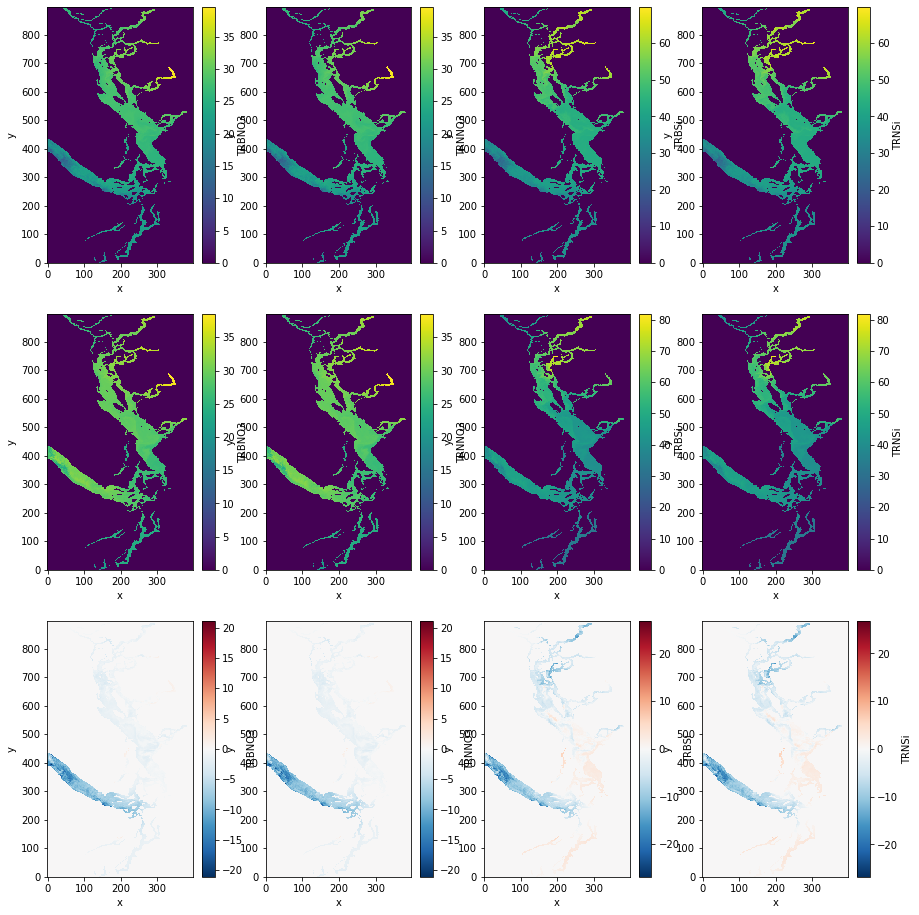

In [25]:
dl = 25
fig, axs = plt.subplots(3, 4, figsize=(15, 16))
for ii, tt in enumerate(nutrient_keys):
    dz[tt][0, dl].plot(ax=axs[0, ii]);
    dn[tt][0, dl].plot(ax=axs[1, ii]);
    (dz[tt][0, dl] - dn[tt][0, dl]).plot(ax=axs[2, ii]);

In [26]:
for key in nutrient_keys:
    dz[key] = dn[key]

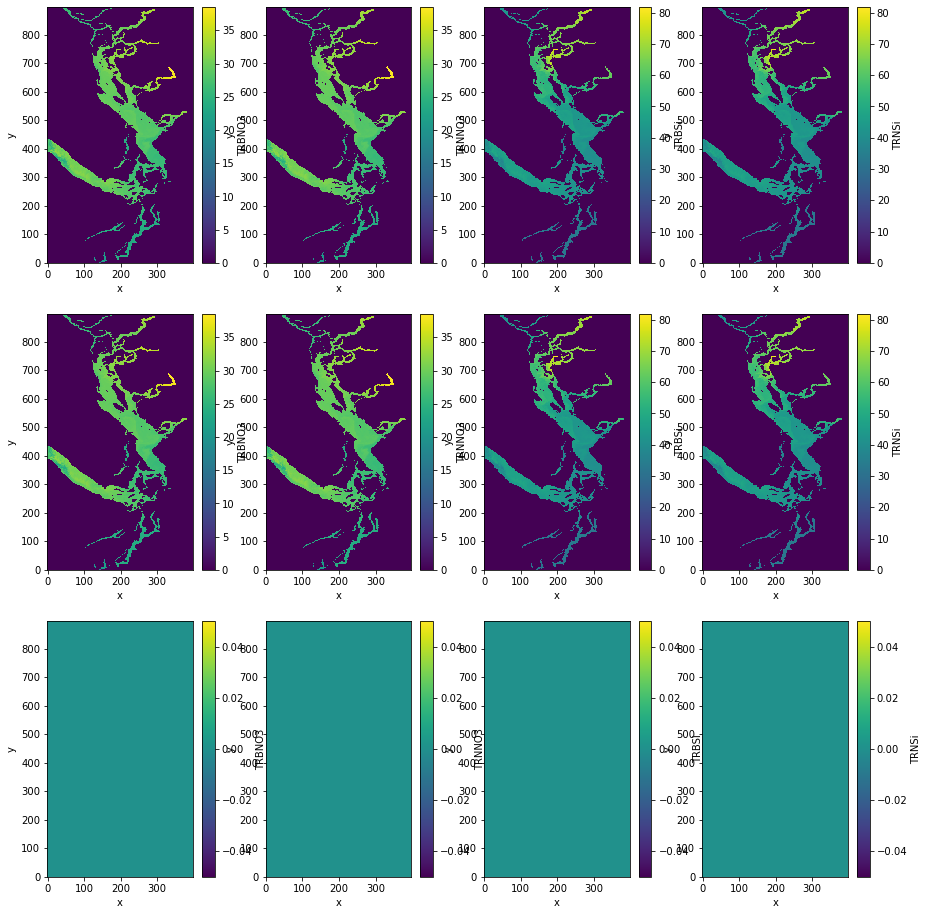

In [27]:
dl = 25
fig, axs = plt.subplots(3, 4, figsize=(15, 16))
for ii, tt in enumerate(nutrient_keys):
    dz[tt][0, dl].plot(ax=axs[0, ii]);
    dn[tt][0, dl].plot(ax=axs[1, ii]);
    (dz[tt][0, dl] - dn[tt][0, dl]).plot(ax=axs[2, ii]);

In [28]:
dz

<xarray.Dataset>
Dimensions:         (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables: (12/67)
    nav_lon         (y, x) float32 ...
    nav_lat         (y, x) float32 ...
    nav_lev         (z) float32 ...
    time_counter    (t) float64 ...
    kt              float64 ...
    ndastp          float64 ...
    ...              ...
    TRBbSi          (t, z, y, x) float64 ...
    TRBTRA          (t, z, y, x) float64 ...
    TRBDIC          (t, z, y, x) float64 ...
    TRBTA           (t, z, y, x) float64 ...
    TRBO2           (t, z, y, x) float64 ...
    TRBMYTRC1       (t, z, y, x) float64 ...
Attributes:
    file_name:     SalishSea_ZeroCiliates_03021840_restart_trc.nc
    TimeStamp:     22/09/2019 20:14:11 -0700
    Manipulation:  All Mesodinium rubrum fields set to zero

In [30]:
dz.attrs['Manipulation'] = dz.attrs['Manipulation'] + 'Si and NO3 from Nov 1, 2007'
netcdf_file = 'SalishSea_ZCil_lowNSi_03021840_restart_trc.nc'
dz.attrs['file_name'] = netcdf_file
dz.attrs

{'file_name': 'SalishSea_ZCil_lowNSi_03021840_restart_trc.nc',
 'TimeStamp': '22/09/2019 20:14:11 -0700',
 'Manipulation': 'All Mesodinium rubrum fields set to zeroSi and NO3 from Nov 1, 2007'}

In [31]:
encoding = {var: {'zlib': True} for var in dz.data_vars}

dz.to_netcdf(netcdf_file, unlimited_dims=('t'),
        encoding=encoding,)

In [33]:
checkfile = xr.open_dataset('SalishSea_ZCil_lowNSi_03021840_restart_trc.nc')

In [34]:
checkfile

<xarray.Dataset>
Dimensions:         (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables: (12/67)
    nav_lon         (y, x) float32 ...
    nav_lat         (y, x) float32 ...
    nav_lev         (z) float32 ...
    time_counter    (t) float64 ...
    kt              float64 ...
    ndastp          float64 ...
    ...              ...
    TRBbSi          (t, z, y, x) float64 ...
    TRBTRA          (t, z, y, x) float64 ...
    TRBDIC          (t, z, y, x) float64 ...
    TRBTA           (t, z, y, x) float64 ...
    TRBO2           (t, z, y, x) float64 ...
    TRBMYTRC1       (t, z, y, x) float64 ...
Attributes:
    file_name:     SalishSea_ZCil_lowNSi_03021840_restart_trc.nc
    TimeStamp:     22/09/2019 20:14:11 -0700
    Manipulation:  All Mesodinium rubrum fields set to zeroSi and NO3 from No...